# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics

from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor as SGDR
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.tree import DecisionTreeRegressor as DTR

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import confusion_matrix as cm

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
modelos=[LinReg(), Lasso(), Ridge(), ElasticNet(), SVR(), SGDR(), RFR(), KNNR(), GBR(), DTR()]

# Import data

In [3]:
test = pd.read_csv("../data/test.csv")
test.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/43916178,20211205213126,2021-12-06,bright room to unplug and disconnect,this bright and quiet bedroom will offer you t...,Amsterdam Oost is becoming every day a more co...,https://a0.muscache.com/pictures/96d9838d-1200...,9574877,https://www.airbnb.com/users/show/9574877,...,5.0,5.0,5.0,0363 06C1 183D 5969 41C2,f,1,0,1,0,2.0
1,1,https://www.airbnb.com/rooms/45539504,20211205213126,2021-12-06,STAY CLOSE IN OUR SEMI-PRIVATE BUNK POD FOR 2,"BUNK Hotel Amsterdam is situated in the hip, u...",Just minutes by free ferry from Central Statio...,https://a0.muscache.com/pictures/44c4cc8e-2dc5...,243878598,https://www.airbnb.com/users/show/243878598,...,NaN,NaN,NaN,Exempt,t,12,0,10,2,NaN


# Evaluation

In [4]:
test.shape

(1389, 73)

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            1389 non-null   int64  
 1   listing_url                                   1389 non-null   object 
 2   scrape_id                                     1389 non-null   int64  
 3   last_scraped                                  1389 non-null   object 
 4   name                                          1389 non-null   object 
 5   description                                   1386 non-null   object 
 6   neighborhood_overview                         967 non-null    object 
 7   picture_url                                   1389 non-null   object 
 8   host_id                                       1389 non-null   int64  
 9   host_url                                      1389 non-null   o

# Cleaning

I first drop those columns that I am no going to use for my prediction

In [6]:
test=test.drop(columns=['listing_url','scrape_id','last_scraped','name', 'description', 'picture_url','host_url','host_name',
                        'host_thumbnail_url',
                        'host_picture_url','license','host_about','description','host_location','host_neighbourhood',
                       'neighbourhood_group_cleansed','bathrooms','calendar_updated','calendar_last_scraped',
                       'host_verifications','host_id','host_since','host_response_time','host_response_rate',
                       'host_acceptance_rate','first_review','last_review'])

In [7]:
test.columns

Index(['id', 'neighborhood_overview', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cal

In [8]:
# I take numeric columnes and from them I drop those that I don´t want to use it to predict.

test_numeric= test._get_numeric_data()

In [9]:
test_numeric.head(2)

,id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,1,1,52.35713,4.92470,1,1.0,1.0,2,1125,...,5.0,5.0,5.0,5.0,5.0,1,0,1,0,2.0
1,1,0,0,52.38810,4.91438,2,1.0,1.0,1,365,...,NaN,NaN,NaN,NaN,NaN,12,0,10,2,NaN


### To fill in null values

In [10]:
# To check null values to be transformed.

null= test_numeric.isnull().sum()
print(null)

id                                                0
host_listings_count                               0
host_total_listings_count                         0
latitude                                          0
longitude                                         0
accommodates                                      0
bedrooms                                         72
beds                                             77
minimum_nights                                    0
maximum_nights                                    0
minimum_minimum_nights                            0
maximum_minimum_nights                            0
minimum_maximum_nights                            0
maximum_maximum_nights                            0
minimum_nights_avg_ntm                            0
maximum_nights_avg_ntm                            0
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability

#### Review_scores_value, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value

In [11]:
test_numeric.review_scores_value.unique()

array([5.  ,  nan, 4.44, 4.45, 4.5 , 4.88, 4.79, 4.87, 4.65, 4.63, 4.75,
       4.56, 4.47, 4.1 , 4.  , 4.59, 4.54, 4.51, 4.57, 4.68, 4.9 , 4.58,
       4.67, 4.83, 4.29, 4.33, 4.76, 4.61, 4.82, 4.6 , 4.84, 4.92, 4.52,
       4.73, 4.46, 4.81, 4.07, 4.35, 4.62, 4.78, 4.89, 4.15, 4.55, 4.69,
       3.67, 4.66, 4.64, 3.8 , 4.43, 4.42, 4.48, 4.86, 4.71, 4.37, 4.41,
       4.77, 4.8 , 4.49, 4.53, 4.39, 4.93, 4.38, 4.7 , 4.34, 4.3 , 4.72,
       4.85, 4.2 , 4.4 , 4.08, 4.74, 4.27, 4.28, 3.5 , 3.93, 4.94, 4.16,
       4.91, 4.95, 4.25, 3.63, 3.57, 4.11, 4.13, 3.  , 3.47, 4.06, 3.75,
       4.26, 3.74, 3.92, 3.2 , 4.31, 4.36, 2.5 , 3.88, 4.96, 4.22, 2.  ,
       4.17, 4.32, 2.6 , 4.14, 4.21, 4.23, 4.19, 4.09, 4.24, 3.77])

In [12]:
# To fill in Nan from review_scores_value with mean value.

test_numeric['review_scores_value'].fillna(float(test_numeric['review_scores_value'].mean()), inplace=True)

In [13]:
test_numeric['review_scores_rating'].fillna(float(test_numeric['review_scores_rating'].mean()), inplace=True)

In [14]:
test_numeric['review_scores_accuracy'].fillna(float(test_numeric['review_scores_accuracy'].mean()), inplace=True)

In [15]:
test_numeric['review_scores_cleanliness'].fillna(float(test_numeric['review_scores_cleanliness'].mean()), inplace=True)

In [16]:
test_numeric['review_scores_checkin'].fillna(float(test_numeric['review_scores_checkin'].mean()), inplace=True)

In [17]:
test_numeric['review_scores_communication'].fillna(float(test_numeric['review_scores_communication'].mean()), inplace=True)

In [18]:
test_numeric['review_scores_location'].fillna(float(test_numeric['review_scores_location'].mean()), inplace=True)

In [19]:
test_numeric['review_scores_value'].fillna(float(test_numeric['review_scores_value'].mean()), inplace=True)

#### Bedrooms

In [20]:
test_numeric.bedrooms.unique()

array([ 1.,  3.,  2., nan,  4.,  5.,  6., 10.])

In [21]:
# To fill in Nan from bedrooms with median.

test_numeric['bedrooms'].fillna(int(test_numeric['bedrooms'].median()), inplace=True)

In [22]:
test_numeric.bedrooms.unique()

array([ 1.,  3.,  2.,  4.,  5.,  6., 10.])

#### Beds

In [23]:
test_numeric.beds.unique()

array([ 1.,  2.,  4.,  3., nan,  5.,  6., 12.,  7., 16., 14., 20.,  8.])

In [24]:
# To fill in Nan of beds with min num of beds.

test_numeric['beds'].fillna(1, inplace=True)

In [25]:
"""
Para las siguientes columna "reviews_per_month" los nan los relleno con 0;
"""

test_numeric.fillna(0, inplace=True)

In [26]:
# I have transformed all Nan

null= test_numeric.isnull().sum()
print(null)

id                                              0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0


## Comprobación matriz correlación

<AxesSubplot:>

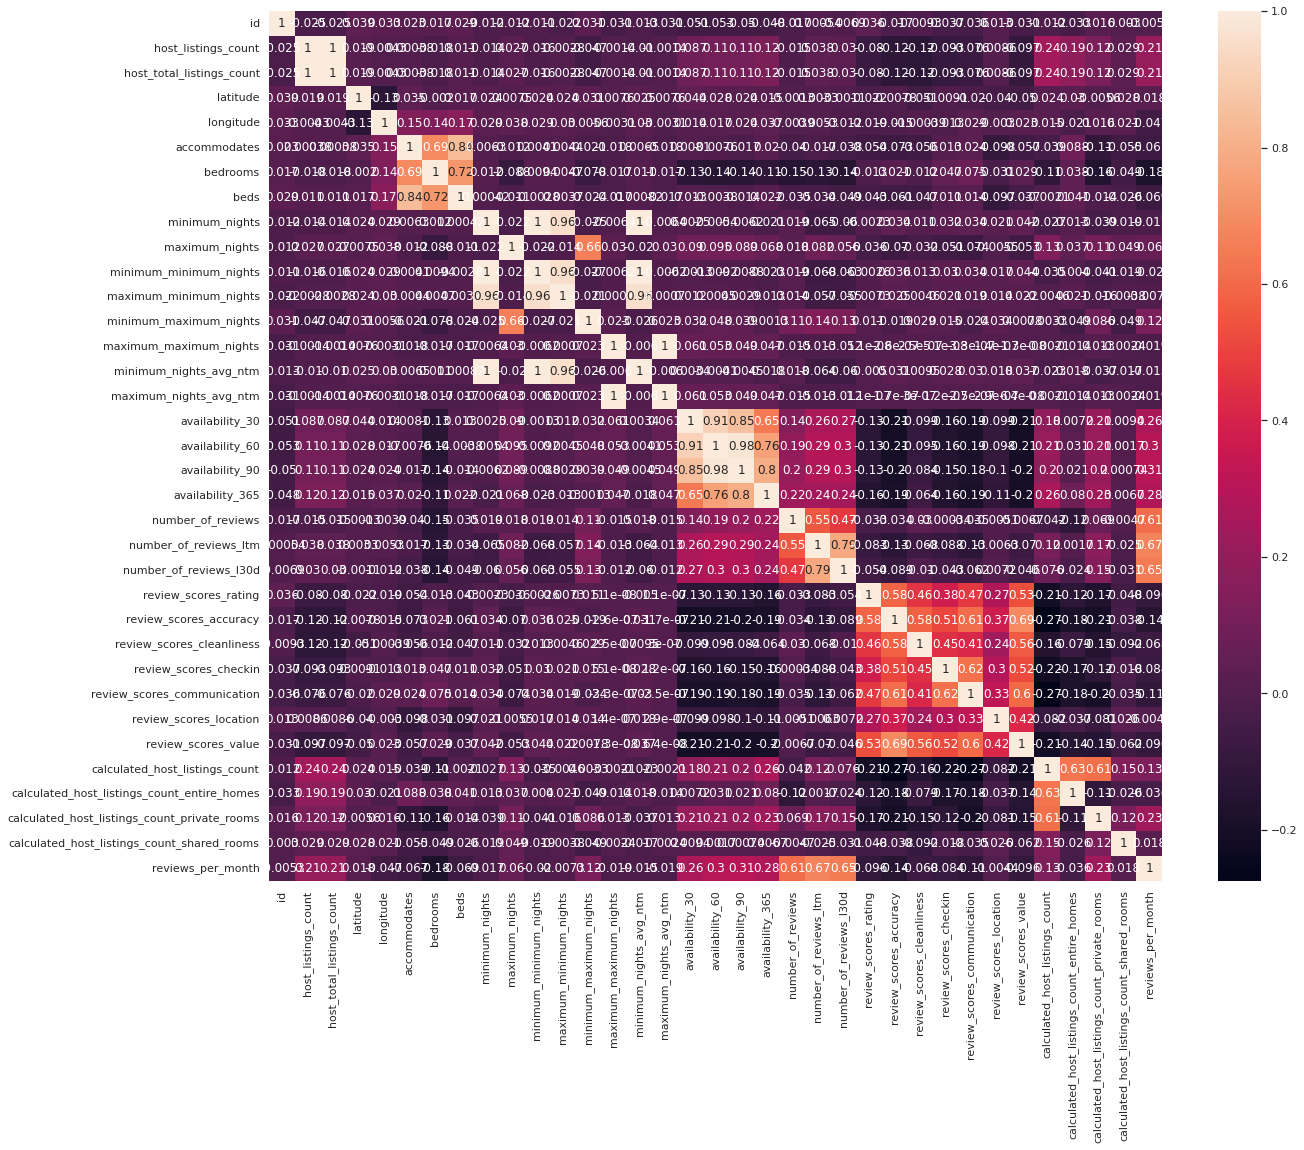

In [27]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (20.,16.)})
sns.set_style("whitegrid")
corrMatrix = test_numeric.corr()
sns.heatmap(corrMatrix, annot=True)

In [28]:
# Aquí elimino las columnas con una correlación mayor de 0,80 así como columnas que considero no aportan valor. Tomadas 
# de la gráfica "feature_importances_".

test_numeric=test_numeric.drop(columns=['host_total_listings_count', 'minimum_minimum_nights', 'maximum_minimum_nights',
                                       'minimum_maximum_nights', 'maximum_maximum_nights', 
                                       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
                                       'number_of_reviews_ltm', 'availability_30', 'availability_365', 'availability_60',
                                       'number_of_reviews_l30d', 'beds', 'reviews_per_month', 'review_scores_accuracy',
                                       'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                                        'review_scores_location', 'review_scores_value', 'calculated_host_listings_count_entire_homes', 
                                        'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'])

In [29]:
# I drop these columns in test also.

test=test.drop(columns=['host_total_listings_count', 'minimum_minimum_nights', 'maximum_minimum_nights',
                                'minimum_maximum_nights', 'maximum_maximum_nights', 
                                'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
                                'number_of_reviews_ltm', 'availability_30', 'availability_365', 'availability_60',
                                'number_of_reviews_l30d', 'beds', 'reviews_per_month', 'review_scores_accuracy',
                                'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                                'review_scores_location', 'review_scores_value', 'calculated_host_listings_count_entire_homes', 
                                'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'])

<AxesSubplot:>

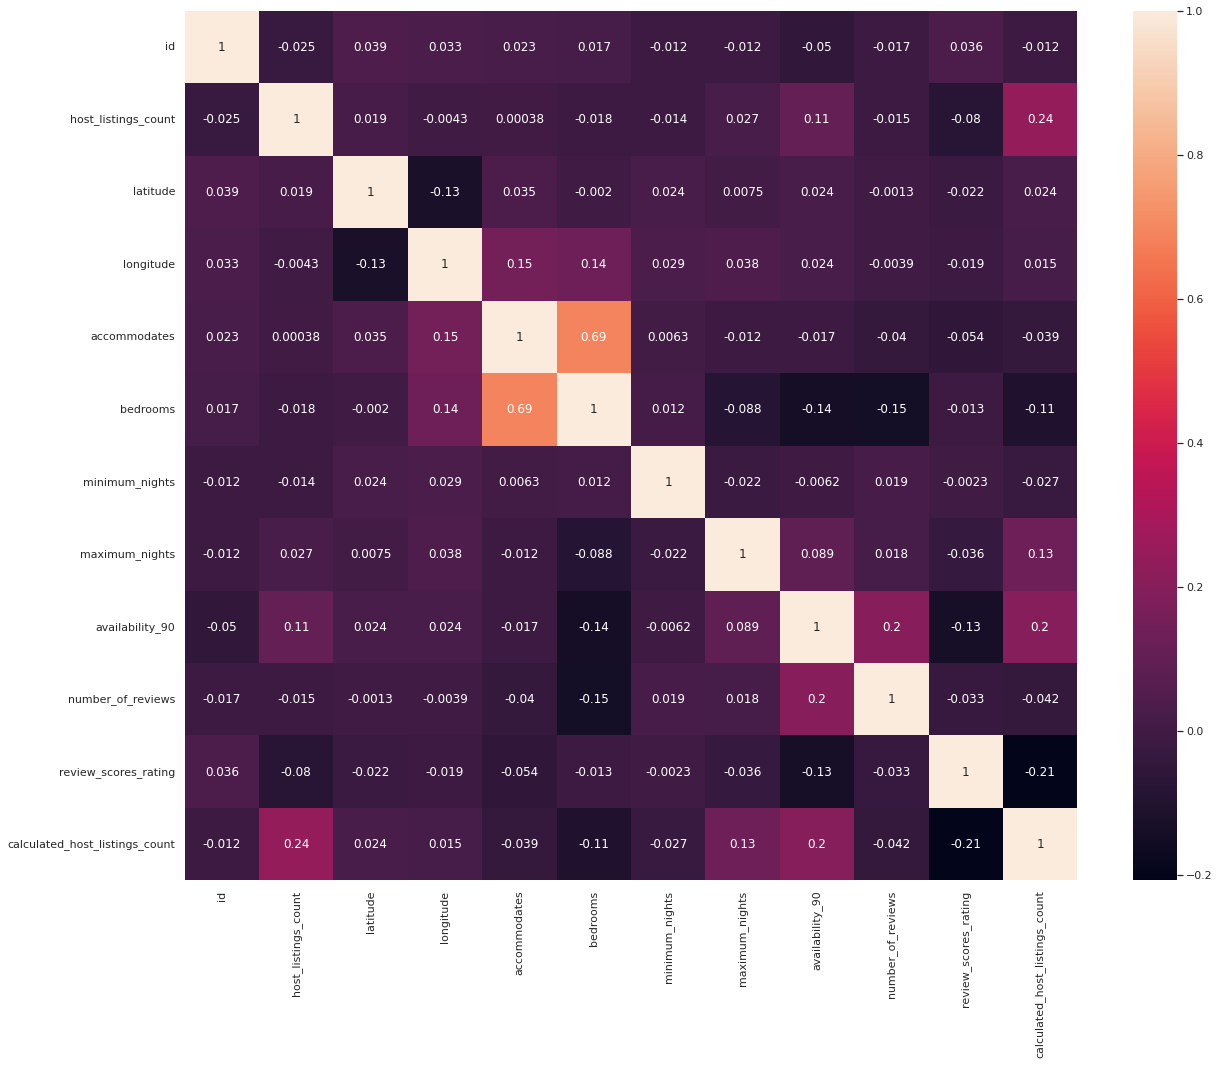

In [30]:
# Matriz de correlación.
sns.set_context("poster")
sns.set(rc={"figure.figsize": (20.,16.)})
sns.set_style("whitegrid")
corrMatrix = test_numeric.corr()
sns.heatmap(corrMatrix, annot=True)

In [31]:
test_numeric.columns

Index(['id', 'host_listings_count', 'latitude', 'longitude', 'accommodates',
       'bedrooms', 'minimum_nights', 'maximum_nights', 'availability_90',
       'number_of_reviews', 'review_scores_rating',
       'calculated_host_listings_count'],
      dtype='object')

In [32]:
test[['id', 'host_listings_count', 'latitude', 'longitude', 'accommodates',
       'bedrooms', 'minimum_nights', 'maximum_nights', 'availability_90',
       'number_of_reviews', 'review_scores_rating',
       'calculated_host_listings_count']] = test_numeric[['id', 'host_listings_count', 'latitude', 'longitude', 'accommodates',
       'bedrooms', 'minimum_nights', 'maximum_nights', 'availability_90',
       'number_of_reviews', 'review_scores_rating',
       'calculated_host_listings_count']]

In [33]:
test.head(3)

,id,neighborhood_overview,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,...,bedrooms,amenities,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count
0,0,Amsterdam Oost is becoming every day a more co...,f,1,t,t,"Amsterdam, Noord-Holland, Netherlands",Oud-Oost,52.35713,4.92470,...,1.0,"[""Hangers"", ""Drying rack for clothing"", ""Freez...",2,1125,t,89,2,5.00000,f,1
1,1,Just minutes by free ferry from Central Statio...,f,0,t,t,"Amsterdam, Noord-Holland, Netherlands",Oud-Noord,52.38810,4.91438,...,1.0,"[""Building staff"", ""Wifi"", ""Long term stays al...",1,365,t,5,0,4.78701,t,12
2,2,NaN,f,1,t,t,NaN,De Baarsjes - Oud-West,52.37370,4.86340,...,1.0,"[""Luggage dropoff allowed"", ""Hangers"", ""Paid p...",5,1125,t,0,10,4.78000,t,1


In [34]:
test.replace({'f': 0, 't': 1}, inplace=True)

In [35]:
test.head(3)

,id,neighborhood_overview,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,...,bedrooms,amenities,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count
0,0,Amsterdam Oost is becoming every day a more co...,0,1,1,1,"Amsterdam, Noord-Holland, Netherlands",Oud-Oost,52.35713,4.92470,...,1.0,"[""Hangers"", ""Drying rack for clothing"", ""Freez...",2,1125,1,89,2,5.00000,0,1
1,1,Just minutes by free ferry from Central Statio...,0,0,1,1,"Amsterdam, Noord-Holland, Netherlands",Oud-Noord,52.38810,4.91438,...,1.0,"[""Building staff"", ""Wifi"", ""Long term stays al...",1,365,1,5,0,4.78701,1,12
2,2,NaN,0,1,1,1,NaN,De Baarsjes - Oud-West,52.37370,4.86340,...,1.0,"[""Luggage dropoff allowed"", ""Hangers"", ""Paid p...",5,1125,1,0,10,4.78000,1,1


In [36]:
test[['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable','bedrooms',
    'has_availability']] = test[['host_is_superhost',
    'host_has_profile_pic','host_identity_verified','instant_bookable','bedrooms',
    'has_availability']].apply(pd.to_numeric,errors='coerce',axis=1)

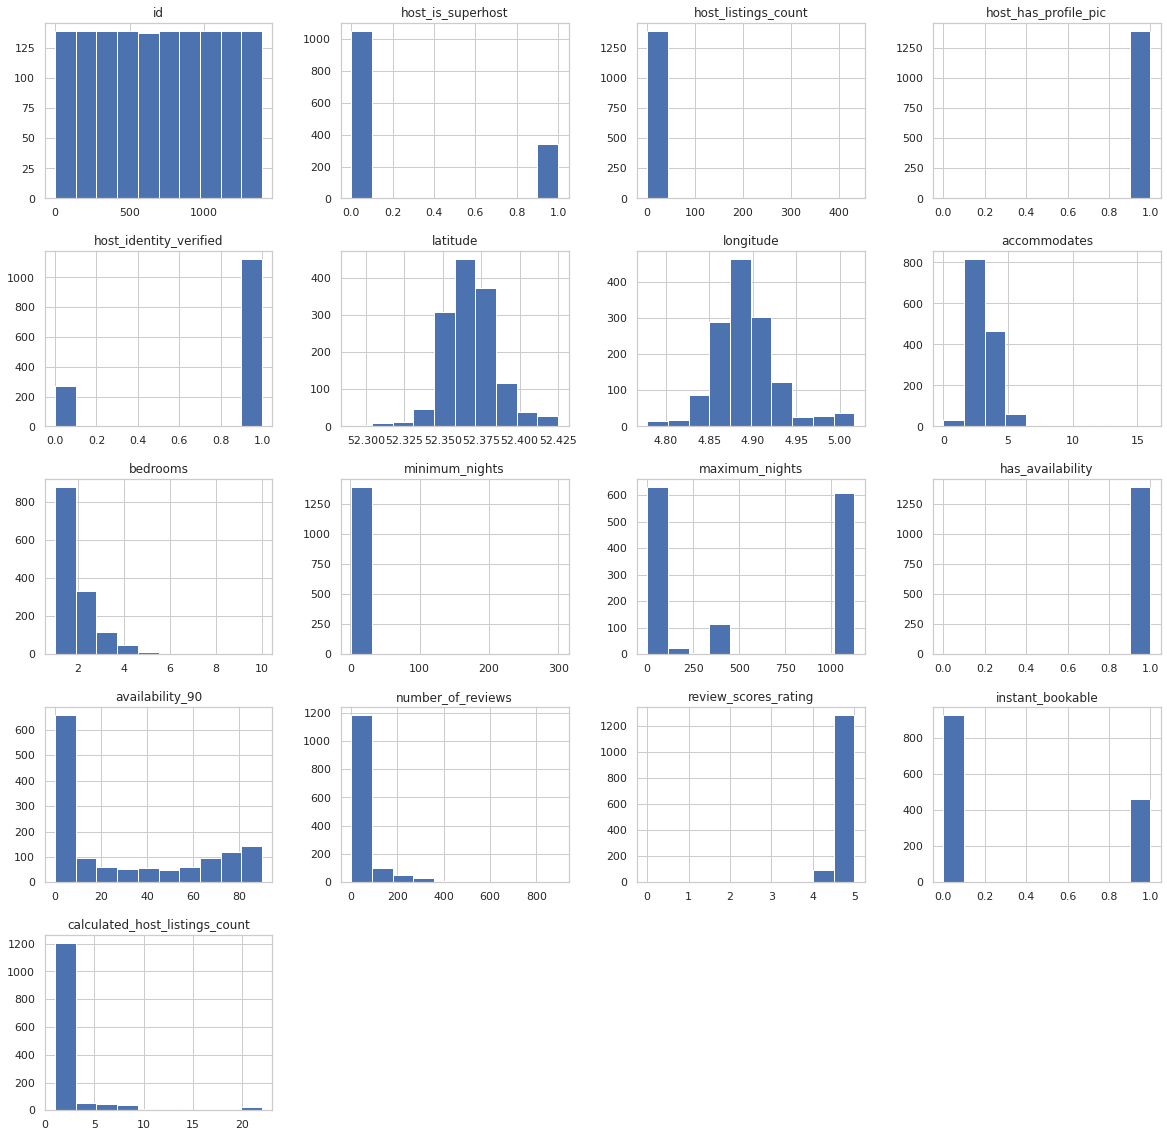

In [37]:
test.hist(figsize=(20,20));
sns.set(rc={"figure.figsize": (20.,20.)})
plt.xticks(size = 0)
plt.yticks(size = 0);

In [38]:
test= test.drop(columns=['has_availability', 'host_has_profile_pic'])

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1389 non-null   int64  
 1   neighborhood_overview           967 non-null    object 
 2   host_is_superhost               1389 non-null   float64
 3   host_listings_count             1389 non-null   int64  
 4   host_identity_verified          1389 non-null   float64
 5   neighbourhood                   967 non-null    object 
 6   neighbourhood_cleansed          1389 non-null   object 
 7   latitude                        1389 non-null   float64
 8   longitude                       1389 non-null   float64
 9   property_type                   1389 non-null   object 
 10  room_type                       1389 non-null   object 
 11  accommodates                    1389 non-null   int64  
 12  bathrooms_text                  13

In [40]:
test.head(2)

,id,neighborhood_overview,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,...,bathrooms_text,bedrooms,amenities,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count
0,0,Amsterdam Oost is becoming every day a more co...,0.0,1,1.0,"Amsterdam, Noord-Holland, Netherlands",Oud-Oost,52.35713,4.92470,Private room in rental unit,...,1 shared bath,1.0,"[""Hangers"", ""Drying rack for clothing"", ""Freez...",2,1125,89,2,5.00000,0.0,1
1,1,Just minutes by free ferry from Central Statio...,0.0,0,1.0,"Amsterdam, Noord-Holland, Netherlands",Oud-Noord,52.38810,4.91438,Shared room in hostel,...,1 shared bath,1.0,"[""Building staff"", ""Wifi"", ""Long term stays al...",1,365,5,0,4.78701,1.0,12


I drop following columns.

In [41]:
test= test.drop(columns=['property_type', 'amenities', 'neighborhood_overview', 'longitude', 'latitude', 'neighbourhood'])

### To clean bathroom_text

In [42]:
# I include in my df the number of bathrooms from "bathrooms_text" in test.

test.bathrooms_text.unique()

array(['1 shared bath', '1 bath', '1 private bath', '1.5 baths',
       '1.5 shared baths', '2 baths', '3 baths', '0 baths', '4 baths',
       '3.5 baths', '2.5 baths', 'Shared half-bath', '2 shared baths',
       '3 shared baths', nan, '0 shared baths', '3.5 shared baths'],
      dtype=object)

In [43]:
# Función sobre la que posteriormente aplico en las columnas de train y test.
import re

patron='[0-9]+'

def limpieza_ba(x):
    n_ba=0
    
    try:
        n_ba=int(re.findall(patron, x)[0])
    except:
        n_ba=0
        
    return n_ba

test.bathrooms_text.apply(limpieza_ba)[:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: bathrooms_text, dtype: int64

In [44]:
test['bathroom']=test.bathrooms_text.apply(limpieza_ba)

In [45]:
test.bathroom.unique()

array([1, 2, 3, 0, 4])

In [46]:
test= test.drop(columns='bathrooms_text')

#### Room_type

In [47]:
test.room_type.unique() 

array(['Private room', 'Shared room', 'Entire home/apt', 'Hotel room'],
      dtype=object)

In [48]:
# Tranformo la columna "room_type" en números enteros de la forma que indico abajo.

dict = {'Private room' : 2, 'Entire home/apt' : 4, "Shared room": 1, "Hotel room": 3}
test=test.replace({"room_type": dict})

In [49]:
test['room_type'] = test.room_type

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1389 non-null   int64  
 1   host_is_superhost               1389 non-null   float64
 2   host_listings_count             1389 non-null   int64  
 3   host_identity_verified          1389 non-null   float64
 4   neighbourhood_cleansed          1389 non-null   object 
 5   room_type                       1389 non-null   int64  
 6   accommodates                    1389 non-null   int64  
 7   bedrooms                        1389 non-null   float64
 8   minimum_nights                  1389 non-null   int64  
 9   maximum_nights                  1389 non-null   int64  
 10  availability_90                 1389 non-null   int64  
 11  number_of_reviews               1389 non-null   int64  
 12  review_scores_rating            13

In [51]:
test.shape

(1389, 16)

In [52]:
test=pd.get_dummies(data=test,columns=['neighbourhood_cleansed'], drop_first=True)


In [53]:
test= test.astype({'host_is_superhost':'int','host_identity_verified':'int','bedrooms':'int',
              'review_scores_rating':'int','instant_bookable':'int'}) 

In [54]:
test.head(3)

,id,host_is_superhost,host_listings_count,host_identity_verified,room_type,accommodates,bedrooms,minimum_nights,maximum_nights,availability_90,...,neighbourhood_cleansed_Noord-Oost,neighbourhood_cleansed_Noord-West,neighbourhood_cleansed_Oostelijk Havengebied - Indische Buurt,neighbourhood_cleansed_Osdorp,neighbourhood_cleansed_Oud-Noord,neighbourhood_cleansed_Oud-Oost,neighbourhood_cleansed_Slotervaart,neighbourhood_cleansed_Watergraafsmeer,neighbourhood_cleansed_Westerpark,neighbourhood_cleansed_Zuid
0,0,0,1,1,2,1,1,2,1125,89,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,1,1,2,1,1,365,5,...,0,0,0,0,1,0,0,0,0,0
2,2,0,1,1,4,2,1,5,1125,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
test.shape

(1389, 36)

In [56]:
test.to_csv('test_cleaned.csv', index=False)